<a href="https://colab.research.google.com/github/hafizur45/deep_learning_fundamental_part1/blob/main/Copy_of_cse_638_deep_learning_fundamentals_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals - Part 1

## Colab environment

In [1]:
!python --version

Python 3.10.12


In [2]:
!pip list | grep tensor

pytensor                         2.14.2
safetensors                      0.4.2
tensorboard                      2.15.1
tensorboard-data-server          0.7.2
tensorflow                       2.15.0
tensorflow-datasets              4.9.4
tensorflow-estimator             2.15.0
tensorflow-gcs-config            2.15.0
tensorflow-hub                   0.16.1
tensorflow-io-gcs-filesystem     0.35.0
tensorflow-metadata              1.14.0
tensorflow-probability           0.22.0
tensorstore                      0.1.45


In [3]:
!pip list | grep torch

torch                            2.1.0+cu121
torchaudio                       2.1.0+cu121
torchdata                        0.7.0
torchsummary                     1.5.1
torchtext                        0.16.0
torchvision                      0.16.0+cu121


In [4]:
!nvidia-smi

# It's okay to run this notebook without a GPU!

Sat Feb  3 05:03:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Basic numerical computing

In [5]:
import numpy as np

# Initialize a numpy ndarray with 3 rows, 2 columns
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [6]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [7]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [8]:
# We can set values of a whole column
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [9]:
X = np.array([
  [1, 2],
  [3, 4],
  [5, 6],
  [7, 8]
])
X

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [10]:
x = np.array([10, 20])
print(x)
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x

[10 20]
(4, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26],
       [17, 28]])

In [11]:
X.shape, x.shape

((4, 2), (2,))

In [12]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120],
       [ 70, 160]])

In [13]:
# Matrix multiplication
# http://matrixmultiplication.xyz/

x = np.array([[10, 20],]).T
result = X @ x  # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170],
       [230]])

### Indexing

In [14]:
X = np.random.rand(3, 2)
X

array([[0.47189187, 0.64746639],
       [0.92186323, 0.09392848],
       [0.85148342, 0.55556374]])

In [15]:
X > 0.5

array([[False,  True],
       [ True, False],
       [ True,  True]])

In [16]:
X[X > 0.5] = 1
X

array([[0.47189187, 1.        ],
       [1.        , 0.09392848],
       [1.        , 1.        ]])

## Basic plotting

In [17]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 640x480 with 0 Axes>

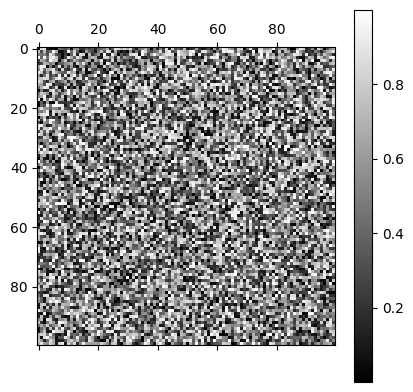

In [18]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

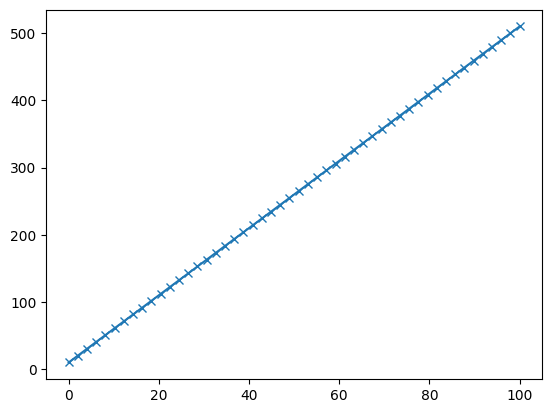

In [19]:
x = np.linspace(0, 100)
y = x * 5 + 10
# y = x * w + b

plt.plot(x, y, 'x-')

## Basic regression with a linear model

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


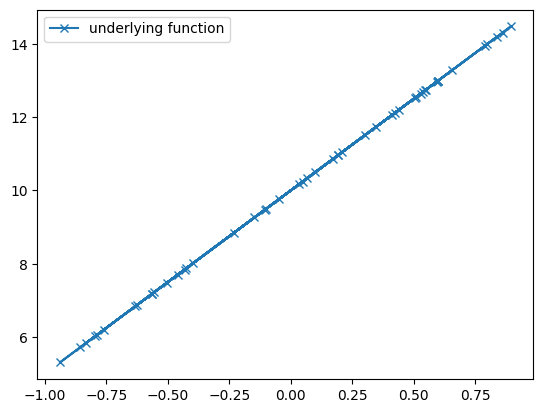

In [20]:
# x is 1-dimensional

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

### Basic prediction function: Linear

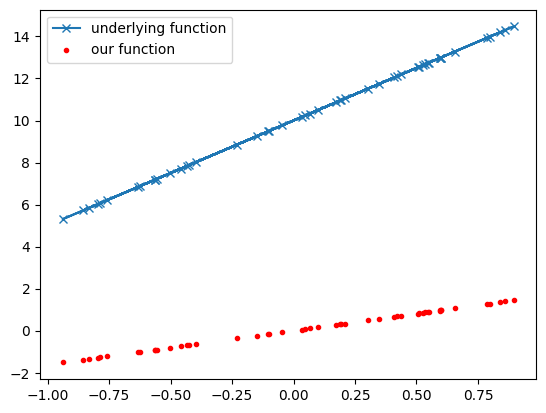

In [21]:
# Let's initialize our predictions

class Linear:
  def __init__(self, input_dim, num_hidden=1):
    # The initialization is important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

### Basic loss function: MSE


In [22]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use Mean Squared Error (MSE) as our loss function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()

loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 106.91491644327338


### Add back propagation

In [23]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output


#y = w*x + b

# Weight Gradient = dw/dy
# Bias Gradiant = db/dy
# X gradiant = dx/dy


  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [24]:
# Take one step forward and one step backward to make sure nothing breaks, and that the loss decreases.
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

108.60594976733135
70.1101937153926


### Train using gradient descent!

Epoch 0, loss 114.48488983300167
Epoch 5, loss 15.040320216354313
Epoch 10, loss 3.1591730366055115
Epoch 15, loss 1.1854199490526147
Epoch 20, loss 0.5887502325226968
Epoch 25, loss 0.3146344909439313
Epoch 30, loss 0.1707368821151294
Epoch 35, loss 0.09293172828537515


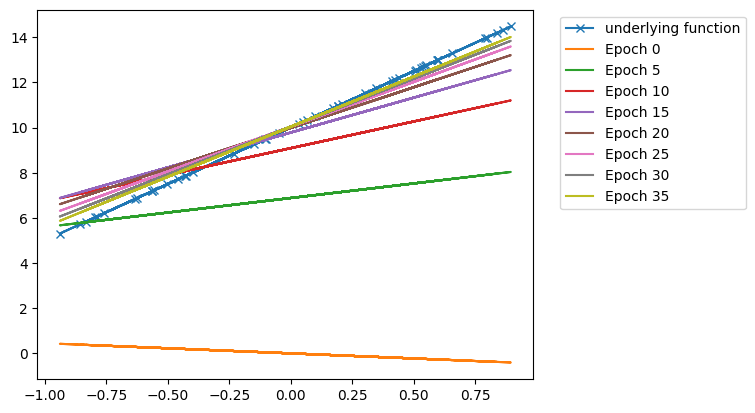

In [25]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

### 2-dimensional inputs work, too

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


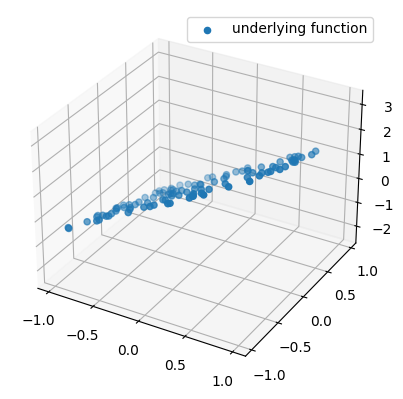

In [26]:
# What about 2-dimensional x?

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

1.1156900663604898


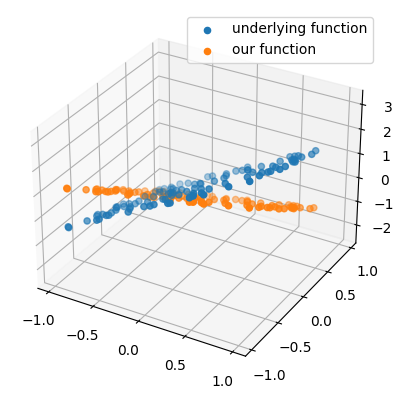

In [27]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 1.1156900663604898
Epoch 1, loss 0.9377398954195547
Epoch 2, loss 0.7935810874930618
Epoch 3, loss 0.6751503498123463
Epoch 4, loss 0.5767344849032711
Epoch 5, loss 0.4941970277851968
Epoch 6, loss 0.42447449585368396
Epoch 7, loss 0.3652459560897477
Epoch 8, loss 0.31471433988461944
Epoch 9, loss 0.2714600916460556
Epoch 10, loss 0.234341880034944
Epoch 11, loss 0.20242813403506932
Epoch 12, loss 0.1749489408259196
Epoch 13, loss 0.15126153826848251
Epoch 14, loss 0.1308250037387093
Epoch 15, loss 0.11318126253002937
Epoch 16, loss 0.09794051887835505
Epoch 17, loss 0.08476984591334684
Epoch 18, loss 0.07338408200702366
Epoch 19, loss 0.06353844957758664


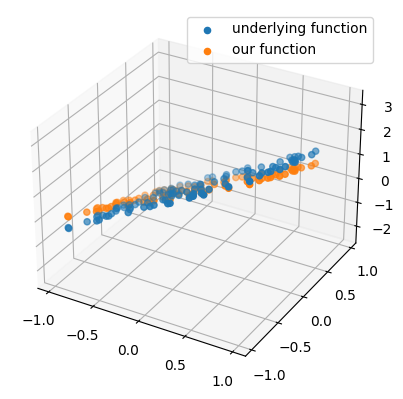

In [28]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

## Basic regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data.

How can this be made to work for non-linear data?

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


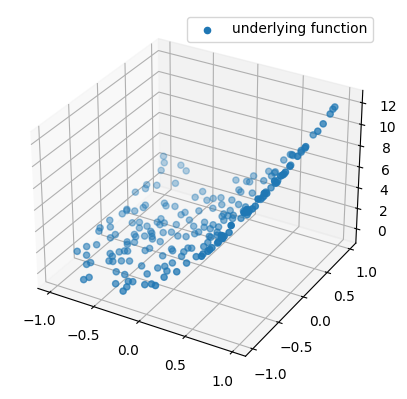

In [29]:
# Make non-linear data

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 19.489329730413505
Epoch 1, loss 15.451772525588208
Epoch 2, loss 12.588597793571726
Epoch 3, loss 10.513993204855506
Epoch 4, loss 8.976473981522789
Epoch 5, loss 7.810960740736936
Epoch 6, loss 6.908119930471421
Epoch 7, loss 6.194725122334393
Epoch 8, loss 5.621057550538731
Epoch 9, loss 5.15280556769035
Epoch 10, loss 4.765841856891071
Epoch 11, loss 4.44284348857872
Epoch 12, loss 4.171093868899618
Epoch 13, loss 3.9410442085181323
Epoch 14, loss 3.745364388727729
Epoch 15, loss 3.578310286566015
Epoch 16, loss 3.435296682566011
Epoch 17, loss 3.3126045294084703
Epoch 18, loss 3.2071767161511087
Epoch 19, loss 3.11647269269751
Epoch 20, loss 3.038362721563715
Epoch 21, loss 2.9710492032829188
Epoch 22, loss 2.9130068207766544
Epoch 23, loss 2.862936023770258
Epoch 24, loss 2.819726174060923
Epoch 25, loss 2.7824258457247275
Epoch 26, loss 2.750218544629648
Epoch 27, loss 2.7224026218723076
Epoch 28, loss 2.698374497559728
Epoch 29, loss 2.677614543473709
Epoch 30, lo

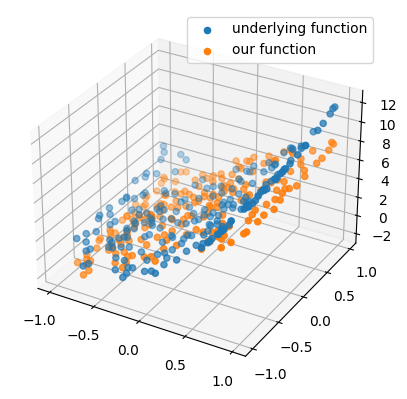

In [30]:
# We can train just fine, but the final loss will remain high, as our linear function is incapable
# of representing the data.

loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

### Add non-linearity: ReLU

In [31]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output

    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Train our new non-linear model

21.500589038782582


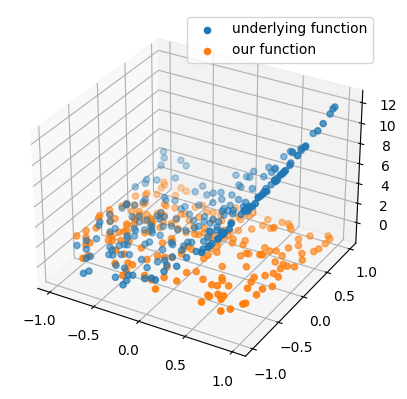

In [32]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)

  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [33]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

19.080209394032845
12.50804299839761


Epoch 0, loss 12.50804299839761
Epoch 1, loss 7.65128488712442
Epoch 2, loss 4.330290282700844
Epoch 3, loss 2.872518262380358
Epoch 4, loss 2.2701462233778704
Epoch 5, loss 1.918567901760375
Epoch 6, loss 1.6307650435675942
Epoch 7, loss 1.3781852571860695
Epoch 8, loss 1.1663252797407002
Epoch 9, loss 0.9935645213599165
Epoch 10, loss 0.8538332338201334
Epoch 11, loss 0.7383901622107828
Epoch 12, loss 0.6414344823780739
Epoch 13, loss 0.5615596666442683
Epoch 14, loss 0.4954364907739638
Epoch 15, loss 0.4406350141799007
Epoch 16, loss 0.3957374032491191
Epoch 17, loss 0.35850402736633813
Epoch 18, loss 0.32667040584994
Epoch 19, loss 0.3002198819657061
Epoch 20, loss 0.27793087607846145
Epoch 21, loss 0.258721701506344
Epoch 22, loss 0.2418167236804969
Epoch 23, loss 0.22709764409318592
Epoch 24, loss 0.21461749978167524
Epoch 25, loss 0.2040726008316959
Epoch 26, loss 0.1948892879300577
Epoch 27, loss 0.1866803195199811
Epoch 28, loss 0.1792639753886393
Epoch 29, loss 0.172901728068

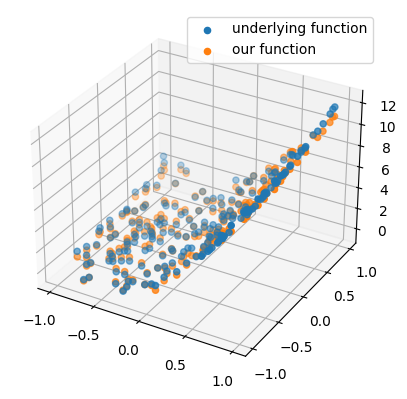

In [34]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))

### Same thing, in PyTorch

In [35]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)

  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(20.9005, grad_fn=<MseLossBackward0>)


In [36]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(20.9005, grad_fn=<MseLossBackward0>)
tensor(7.9590, grad_fn=<MseLossBackward0>)


tensor(7.9590, grad_fn=<MseLossBackward0>)
tensor(4.9131, grad_fn=<MseLossBackward0>)
tensor(3.4152, grad_fn=<MseLossBackward0>)
tensor(2.5054, grad_fn=<MseLossBackward0>)
tensor(1.9354, grad_fn=<MseLossBackward0>)
tensor(1.5550, grad_fn=<MseLossBackward0>)
tensor(1.2770, grad_fn=<MseLossBackward0>)
tensor(1.0707, grad_fn=<MseLossBackward0>)
tensor(0.9165, grad_fn=<MseLossBackward0>)
tensor(0.7967, grad_fn=<MseLossBackward0>)
tensor(0.7039, grad_fn=<MseLossBackward0>)
tensor(0.6306, grad_fn=<MseLossBackward0>)
tensor(0.5719, grad_fn=<MseLossBackward0>)
tensor(0.5246, grad_fn=<MseLossBackward0>)
tensor(0.4850, grad_fn=<MseLossBackward0>)
tensor(0.4514, grad_fn=<MseLossBackward0>)
tensor(0.4224, grad_fn=<MseLossBackward0>)
tensor(0.3975, grad_fn=<MseLossBackward0>)
tensor(0.3756, grad_fn=<MseLossBackward0>)
tensor(0.3562, grad_fn=<MseLossBackward0>)
tensor(0.3391, grad_fn=<MseLossBackward0>)
tensor(0.3237, grad_fn=<MseLossBackward0>)
tensor(0.3097, grad_fn=<MseLossBackward0>)
tensor(0.29

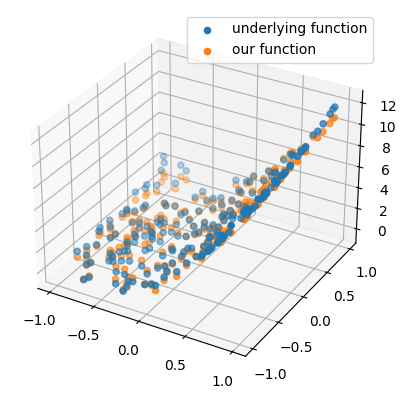

In [37]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())

### Same thing, in Tensorflow/Keras

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 regression (Dense)          (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 2s 8ms/step - loss: 11.4980
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 1.3169
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 0.5502
Epoch 4/10
7/7 [==============================] - 0s

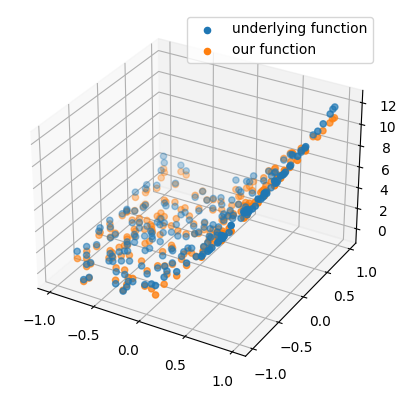

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))